**Business Understanding** 
```python
QUESTIONS
```
1º - What is the most expansive neighbourhoods in Rio de Janeiro? (IN OTHER NOTEBOOK)



2º - What time of year has the higher rental price?


3º -  What are the features that influence the property pricing?


4º - How are the listings distributeds on Rio de Janeiro?


5º - Create a model to predict property price. (IN OTHER NOTEBOOK)


In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [163]:
# import data set
df = pd.read_csv('C:/Users/zanin/OneDrive/Área de Trabalho/airbnbrj/listingsrj.csv')
df_cal = pd.read_csv('C:/Users/zanin/OneDrive/Área de Trabalho/airbnbrj/calendar.csv')


In [164]:
# columns will all value as NaN(null) is useless to our analysis and can't be filled with any reference value in the column.
# Removing the columns which has all values NaN(null).
df.dropna(axis=1, how='all', inplace=True)
df.shape

(26366, 71)

Variables of interest: Price or Price per accomodation?



In [165]:
# remove money ($) sign and convert to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['price'].fillna(df['price'].median(), inplace = True)


In [166]:
# removing outliers in price to better analize and visualize the data.
cols = ['price'] 

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [167]:
# create the variable price oer accomodate
df['ppa'] = df['price']/df['accommodates']

In [168]:
# Accordanly with summary of df, bathrooms was deleted because had all values NaN(null), but the correct information was placed in bethrooms_text that was 'object' type,
# for that we will rename the column bethrooms_text to bethrooms to better visualization, and than converte only the numbers to float

df.rename(columns={'bathrooms_text' : 'bathrooms'}, inplace=True)
df['bathrooms'] = df['bathrooms'].str.extract('(\d+)').astype(float)

In [169]:
# drop na rows in bathrooms, bedrooms and beds since they have differente numbers of rows with NaN(null) values
df.dropna(axis=0, subset=['bathrooms', 'bedrooms', 'beds'], inplace=True)

# Creating a new dataframe with bathrooms, bedrooms and beds.
df_rooms = df[['bathrooms', 'bedrooms', 'beds']]

# Converting the data type from string to integer
for room in df_rooms:
    df_rooms[room].astype(int)

#Assigning the converted values from df_rooms to the df_list dataframe
df[['bathrooms', 'bedrooms', 'beds']] = df_rooms[['bathrooms', 'bedrooms', 'beds']]


In [170]:

# Lets fill na with median values for reviews columns
#The review data distribution above show that the data is highly skewed to left
#To avoid bias in result due to skewness we chose mean to fill na instead of other methods 
for feature in ["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", 
                "review_scores_checkin", "review_scores_communication", "review_scores_location", 
                "review_scores_value", "reviews_per_month"]:
    df[feature].fillna(df[feature].mean(), inplace = True)

In [171]:
# select the numerical features 
df_int = df.select_dtypes(include=['float64', 'int64', 'int32'])

# add categorical columns to df_int 
df_int[['superhost', 'room_type', 'neighbourhood_cleansed', 'property_type', 'host_response_time']] = df[['host_is_superhost', 'room_type', 'neighbourhood_cleansed', 'property_type', 'host_response_time']]


In [172]:
#Handle Categorical Variable

cleanup_nums = {'superhost': {'t':1, 'f': 2},
'room_type': {'Entire home/apt': 1, 'private room': 2, 'shared room': 3}}
df_int_copy = df_int
df_int_copy = df_int_copy.replace(cleanup_nums)

#neighbourhood_cleansed, property_type, host_response_time 
df_int_dummies = pd.get_dummies(df_int_copy)

In [173]:
#Analyse the listing dataset
#Count the number of total number of entries for each type in room_type feature
df_int.groupby(['room_type']).count()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,ppa,superhost,neighbourhood_cleansed,property_type,host_response_time
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,16424,16424,16424,16422,16422,16424,16424,16424,16424,16424,...,16424,16424,16424,16424,16424,16424,16424,16424,16424,14636
Hotel room,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,39,40,40,38
Private room,5216,5216,5216,5216,5216,5216,5216,5216,5216,5216,...,5216,5216,5216,5216,5216,5216,5216,5216,5216,4538
Shared room,473,473,473,473,473,473,473,473,473,473,...,473,473,473,473,473,473,473,473,473,416


C:\Users\zanin\AppData\Local\Temp\ipykernel_20508\2664079402.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_int[df_int.room_type == 'Private room']['price'],
C:\Users\zanin\AppData\Local\Temp\ipykernel_20508\2664079402.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_int[df_int.ro

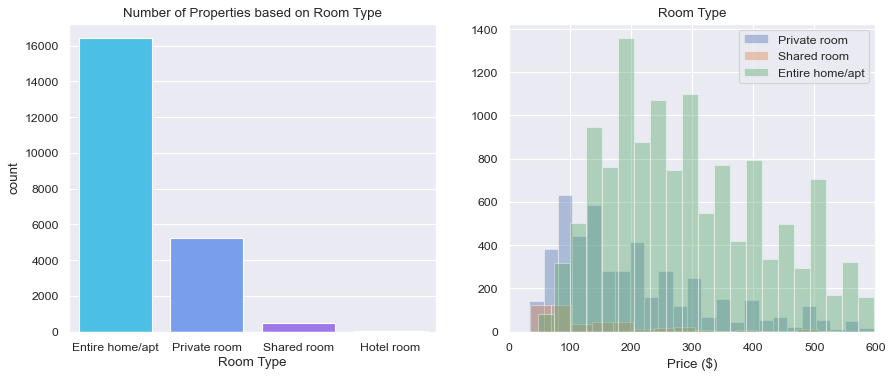

In [174]:
#Visualize the data to interpret the room_type and their mean price for each type
fig, axs = plt.subplots(1, 2, figsize=(13, 5), dpi=80)
sns.countplot(x = 'room_type', data = df_int, 
              palette = 'cool', ax=axs[0]).set_title("Number of Properties based on Room Type")
axs[0].set_xlabel('Room Type')


#Visualize and understand the distriution of pricing among the each room type.
sns.distplot(df_int[df_int.room_type == 'Private room']['price'],
             kde=False, ax=axs[1], label='Private room')
sns.distplot(df_int[df_int.room_type == 'Shared room']['price'],
             kde=False, ax=axs[1], label='Shared room')
sns.distplot(df_int[df_int.room_type == 'Entire home/apt']['price'],
             kde=False, ax=axs[1], label='Entire home/apt')

axs[1].set_xlim(0, 600);
axs[1].set_title('Room Type');
axs[1].set_xlabel('Price ($)');
axs[1].legend();

The Entire home/apt have the maximum number of entries in the Rio de Janeiro listings.

Checking at the price distribution of Entire home/apt, the maximum number of listings are between 100-300 R$(reais) .

The private rooms are maximum distributed between 50-150 R$(reais).

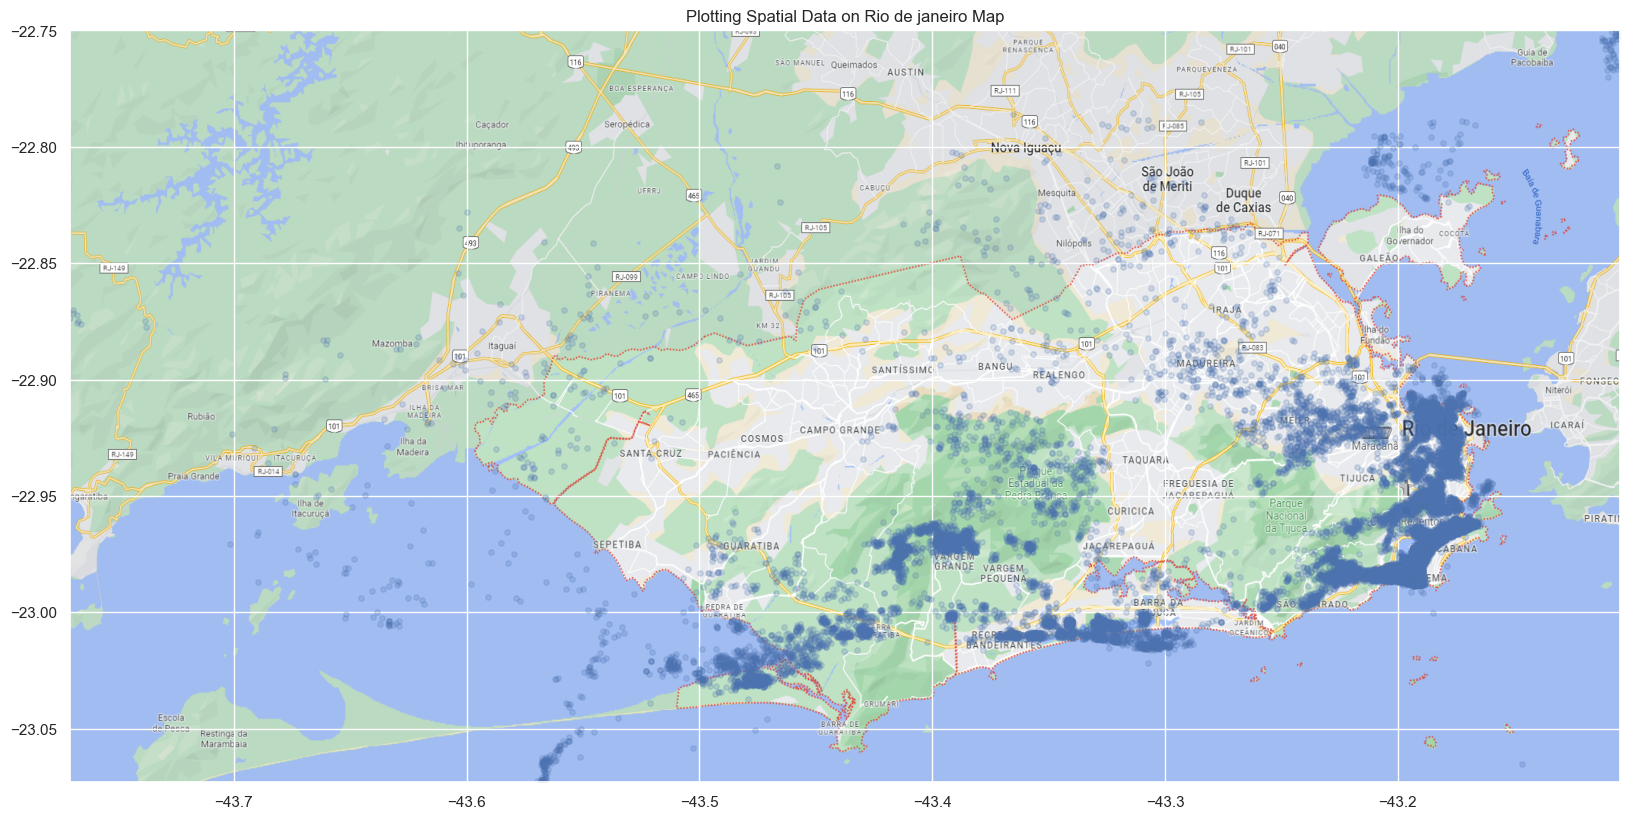

In [175]:
#Visualize the spatial data on Boston Map
BBox = (df_int.longitude.min(), df_int.longitude.max(), df_int.latitude.min(), df_int.latitude.max())
BBox

ruh_m = plt.imread('C:/Users/zanin/OneDrive/Área de Trabalho/airbnbrj/rio11.png')

fig, ax = plt.subplots(figsize = (20,15))
ax.scatter(df_int.longitude, df_int.latitude, zorder=1, alpha= 0.2, c='b', s=15)
ax.set_title('Plotting Spatial Data on Rio de janeiro Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

Above we can see the approximated distribution of the of listings through the city of rio, as the city map shows a very dense number of listings are distribuited along the litoral in mojority. We can observe a highly populated
area on the neighbourhoods of copacabana, barra da tijuca, ipanema, jacarepaguá, recreio dos bandeirantes, leblon botafogo and so on, the center area have also high quantity of listings and close to tourist points as "cristo rendentor" and "maracana".


In [176]:
# Extract month from dates column

df_cal['month'] = df_cal.date.apply(lambda value: value.split('-')[1])
df_cal['month'] = df_cal['month'].replace({
    '01': 'Jan',
    '02': 'Feb',
    '03': 'Mar',
    '04': 'Apr',
    '05': 'May',
    '06': 'Jun',
    '07': 'Jul',
    '08': 'Aug',
    '09': 'Sep',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec'
})

# Removing adjusted_price column and using only price, to better formart the model, and trying to avoid confusions
# Remove special characters $ from price column and convert to float 
# Drop rows with NaN (null) value in price column, as we have enough rows of data to gain some confidance

df_cal.drop(axis=1, labels=['adjusted_price'], inplace=True)
df_cal.dropna(axis = 0, subset = ["price"], inplace = True)
df_cal["price"] = df_cal["price"].map(lambda x: x.replace("$",'').replace(",",''), na_action = 'ignore').astype(float)

df_cal.head()

,listing_id,date,available,price,minimum_nights,maximum_nights,month
0,53344884,2022-09-22,t,3500.0,3.0,365.0,Sep
1,53344884,2022-09-23,t,3500.0,3.0,365.0,Sep
2,53344884,2022-09-24,t,3500.0,3.0,365.0,Sep
3,53344884,2022-09-25,t,3500.0,3.0,365.0,Sep
4,53344884,2022-09-26,t,3500.0,3.0,365.0,Sep


C:\Users\zanin\AppData\Local\Temp\ipykernel_20508\901890008.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_roomtype = df_int.groupby(['room_type', 'bedrooms'], as_index = False).mean()


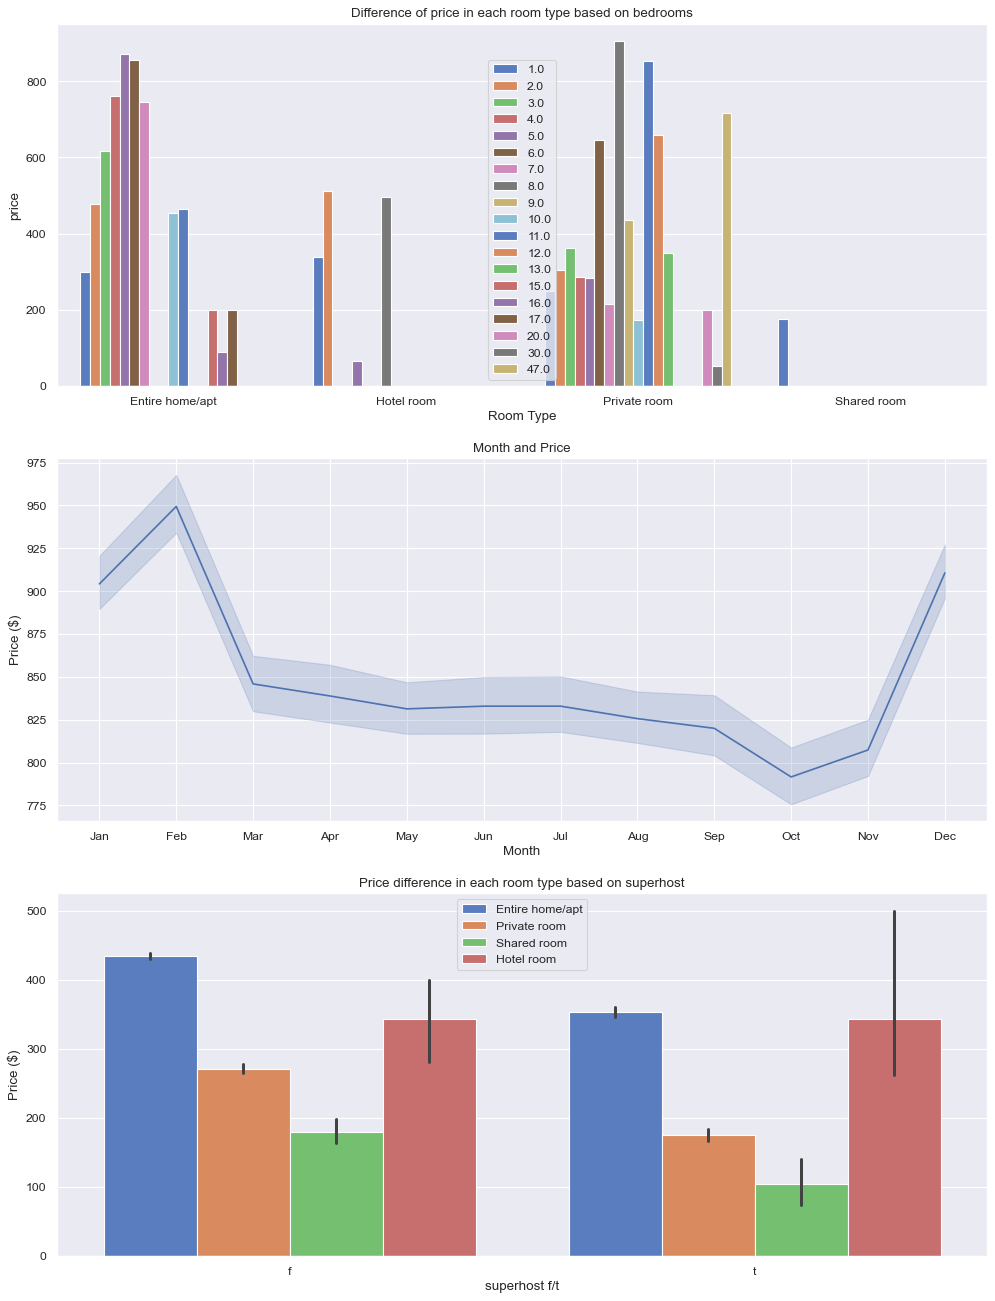

<Figure size 1000x500 with 0 Axes>

In [177]:
fig, axs = plt.subplots(3, 1, figsize=(15, 20), dpi=80)

df_roomtype = df_int.groupby(['room_type', 'bedrooms'], as_index = False).mean()


# Room type
sns.barplot(x="room_type", y="price", hue= 'bedrooms', data= df_roomtype, 
            palette= 'muted', ax=axs[0])

axs[0].set_title('Difference of price in each room type based on bedrooms')
axs[0].set_xlabel('Room Type')
axs[0].legend()


#calendar
cats = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_cal['month'] = pd.Categorical(df_cal['month'], ordered=True, categories=cats)

plt.figure(figsize=(10,5))

sns.lineplot(data = df_cal, x = "month", y = "price", sort=True, ax = axs[1])

axs[1].set_title("Month and Price")
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Price ($)')


#Superhost
sns.barplot(x="superhost", y="price", hue= 'room_type', data= df_int, 
            palette= 'muted', ax=axs[2])

axs[2].set_title('Price difference in each room type based on superhost')
axs[2].set_xlabel('superhost f/t')
axs[2].set_ylabel('Price ($)')
axs[2].legend()


plt.tight_layout()
plt.show();

As we can see on the first barchart the listing prices are directly co-related with rooms types and also with the bedrooms available, we see that the price increse relatively with an increse in the number of bedrooms. if we take a look on chart 'Difference of price in each room type based on bedrooms'is possible see that Entire home/apartment is really expensive in Rio de Janeiro, on this dataset.

As we can see in the online graph, the price appears to have increased significantly from November onwards, and remains high throughout the end of the year, including Christmas and New Year, which are culturally celebrated dates in Brazil, but it only reaches its peak in February, month in which carnival usually takes place, the biggest and most famous Brazilian party where everyone dresses up and celebrates throughout the month, bringing together more than 4 million people, and almost 500 thousand foreigners, which evidently causes a great demand for accommodation in the city.

The "Price Difference in Each Room Type Based on Superhost" chart again shows a similarity in high prices for the entire home/apt, while another insight we can draw is that Superhosted properties are generally lower than properties with normal hosts, both in whole houses and in all types of accommodation, this seems strange but we have to take into account that the offer of regular hosts is many times greater and that there are some outliers that can affect the chart.